In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [2]:
vocab_size = 1000  # hypothetical vocabulary size
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=10),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\User\PycharmProjects\pythonProject3\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = ["This is an example sentence", "Another text data example"]  # Sample sentences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length as required by the model
X_data = pad_sequences(sequences, maxlen=10)
y_data = np.array([0, 1])  # Example labels

In [4]:
model.fit(X_data, y_data, epochs=10, batch_size=2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5000 - loss: 0.6764
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6682
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6601
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6521
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6441
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6362
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6282
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6203
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.6124
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.6046


In [5]:
embeddings = model.layers[0].get_weights()[0]

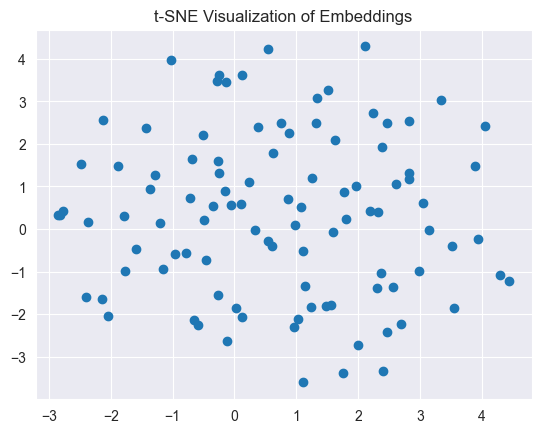

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings[:100])  # Visualize only part of the vocabulary

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('t-SNE Visualization of Embeddings')
plt.show()